Descargar dataset

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-100k.zip

--2025-10-01 22:32:17--  http://files.grouplens.org/datasets/movielens/ml-100k.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.grouplens.org/datasets/movielens/ml-100k.zip [following]
--2025-10-01 22:32:18--  https://files.grouplens.org/datasets/movielens/ml-100k.zip
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4924029 (4.7M) [application/zip]
Saving to: ‘ml-100k.zip’

ml-100k.zip         100%[===================>]   4.70M  3.54MB/s    in 1.3s    

2025-10-01 22:32:20 (3.54 MB/s) - ‘ml-100k.zip’ saved [4924029/4924029]



In [ ]:
import zipfile

zip_file_path = 'ml-100k.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
import pandas as pd

ratings_df = pd.read_csv('ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])


genre_names = ['unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movie_cols = ['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL'] + genre_names
movies_df = pd.read_csv('ml-100k/u.item', sep='|', encoding='latin-1', names=movie_cols)

users_df = pd.read_csv('ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

print("Columns in movies_df:")
print(movies_df.columns.tolist())

display(ratings_df.head())
display(movies_df.head())
display(users_df.head())

Columns in movies_df:
['item_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,item_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Analyze the data

### Subtask:
Perform exploratory data analysis to understand the dataset's structure and content.


**Reasoning**:
Print the shape, info, describe, and missing values for each dataframe to understand their structure and content as requested by the instructions.



In [ ]:
print("Ratings DataFrame Info:")
print(ratings_df.shape)
ratings_df.info()
print("\nRatings DataFrame Descriptive Statistics:")
display(ratings_df.describe())
print("\nRatings DataFrame Missing Values:")
print(ratings_df.isnull().sum())

print("\nMovies DataFrame Info:")
print(movies_df.shape)
movies_df.info()
print("\nMovies DataFrame Descriptive Statistics:")
display(movies_df.describe())
print("\nMovies DataFrame Missing Values:")
print(movies_df.isnull().sum())

print("\nUsers DataFrame Info:")
print(users_df.shape)
users_df.info()
print("\nUsers DataFrame Descriptive Statistics:")
display(users_df.describe())
print("\nUsers DataFrame Missing Values:")
print(users_df.isnull().sum())

Ratings DataFrame Info:
(100000, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Ratings DataFrame Descriptive Statistics:


,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08



Ratings DataFrame Missing Values:
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

Movies DataFrame Info:
(1682, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_id      1682 non-null   int64  
 1   movie_title  1682 non-null   object 
 2   col_0        1681 non-null   object 
 3   col_1        0 non-null      float64
 4   col_2        1679 non-null   object 
 5   col_3        1682 non-null   int64  
 6   col_4        1682 non-null   int64  
 7   col_5        1682 non-null   int64  
 8   col_6        1682 non-null   int64  
 9   col_7        1682 non-null   int64  
 10  col_8        1682 non-null   int64  
 11  col_9        1682 non-null   int64  
 12  col_10       1682 non-null   int64  
 13  col_11       1682 non-null   int64  
 14  col_12       1682 non-null   int64  
 15  col_13       1682 non-null   in

,item_id,col_1,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Movies DataFrame Missing Values:
item_id           0
movie_title       0
col_0             1
col_1          1682
col_2             3
col_3             0
col_4             0
col_5             0
col_6             0
col_7             0
col_8             0
col_9             0
col_10            0
col_11            0
col_12            0
col_13            0
col_14            0
col_15            0
col_16            0
col_17            0
col_18            0
col_19            0
col_20            0
col_21            0
dtype: int64

Users DataFrame Info:
(943, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

Users

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000



Users DataFrame Missing Values:
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64


## Métricas


In [ ]:
num_users = users_df['user_id'].nunique()
num_movies = movies_df['item_id'].nunique()
num_ratings = ratings_df.shape[0]
average_rating = ratings_df['rating'].mean()
num_occupations = users_df['occupation'].nunique()

user_ratings_count = ratings_df['user_id'].value_counts()
cold_start_users = user_ratings_count[user_ratings_count < 50].shape[0]

item_ratings_count = ratings_df['item_id'].value_counts()
cold_start_items = item_ratings_count[item_ratings_count < 30].shape[0]

std_rating = ratings_df['rating'].std()

highest_rating = ratings_df['rating'].max()
lowest_rating = ratings_df['rating'].min()

max_item_ratings = item_ratings_count.max()
min_item_ratings = item_ratings_count.min()

average_item_rating = ratings_df.groupby('item_id')['rating'].mean().mean()

average_user_rating = ratings_df.groupby('user_id')['rating'].mean().mean()

average_reviews_per_user = ratings_df.shape[0] / users_df.shape[0]

average_reviews_per_item = ratings_df.shape[0] / movies_df.shape[0]

min_user_ratings = user_ratings_count.min()
max_user_ratings = user_ratings_count.max()


print(f"Number of unique users: {num_users}")
print(f"Number of unique movies: {num_movies}")
print(f"Total number of ratings: {num_ratings}")
print(f"Average rating: {average_rating:.2f}")
print(f"Number of unique occupations: {num_occupations}")
print(f"Number of cold start users (<50 reviews): {cold_start_users}")
print(f"Number of cold start items (<30 reviews): {cold_start_items}")
print(f"Standard deviation of ratings: {std_rating:.2f}")
print(f"Highest rating: {highest_rating}")
print(f"Lowest rating: {lowest_rating}")
print(f"Maximum ratings per item: {max_item_ratings}")
print(f"Minimum ratings per item: {min_item_ratings}")
print(f"Average rating per item: {average_item_rating:.2f}")
print(f"Average rating given by users: {average_user_rating:.2f}")
print(f"Average number of reviews per user: {average_reviews_per_user:.2f}")
print(f"Average number of reviews per item: {average_reviews_per_item:.2f}")
print(f"Maximum ratings per user: {max_user_ratings}")
print(f"Minimum ratings per user: {min_user_ratings}")

Number of unique users: 943
Number of unique movies: 1682
Total number of ratings: 100000
Average rating: 3.53
Number of unique occupations: 21
Number of cold start users (<50 reviews): 375
Number of cold start items (<30 reviews): 876
Standard deviation of ratings: 1.13
Highest rating: 5
Lowest rating: 1
Maximum ratings per item: 583
Minimum ratings per item: 1
Average rating per item: 3.08
Average rating given by users: 3.59
Average number of reviews per user: 106.04
Average number of reviews per item: 59.45
Maximum ratings per user: 737
Minimum ratings per user: 20


# Gráficos

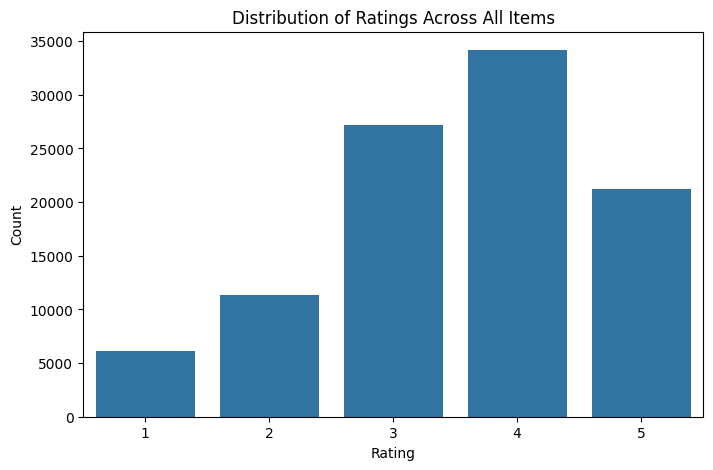

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=ratings_df)
plt.title('Distribution of Ratings Across All Items')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

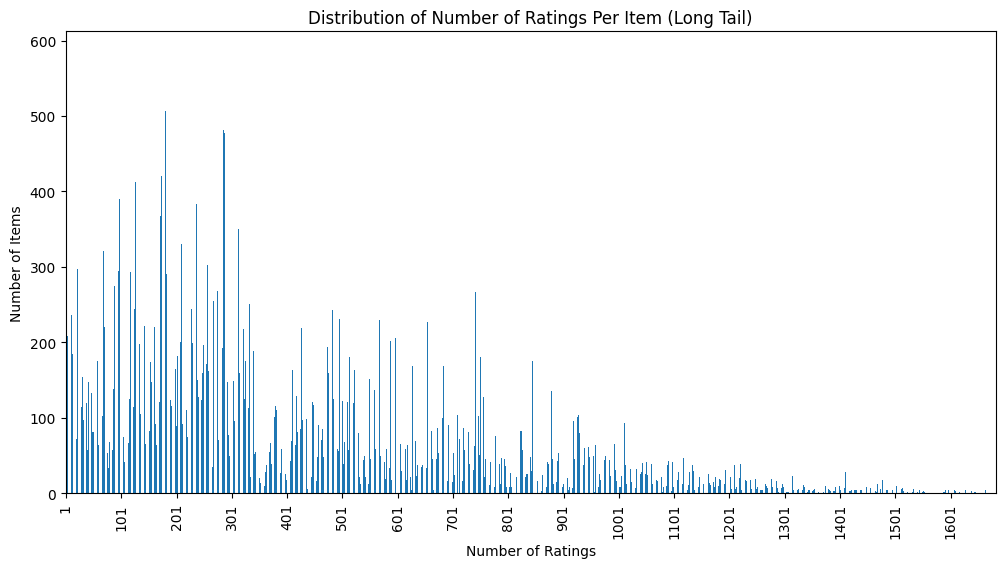

In [ ]:

item_ratings_count = ratings_df['item_id'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
item_ratings_count.plot(kind='bar')
plt.title('Distribution of Number of Ratings Per Item (Long Tail)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Items')

plt.xticks(range(0, len(item_ratings_count), x_ticks_interval), item_ratings_count.index[::x_ticks_interval], rotation=90)
plt.show()
